In [1]:
import matplotlib.pyplot as plt
import numpy as np

import pydyns as dyns

In [2]:
!pip install pybind11

In [3]:
!pip install pydyns

In [4]:
f0 = 0.5

In [5]:
N = 100

PMs = []
plane_equation = (1, 1, 0, 0)   # -x + y = 0

for _f in range(0, 200 + 1, 1):
    f = _f/100
    ds = dyns.DynamicSystem([0.1,0.1], ["y", "f*sin(sin(3.5*t))-y+10*x-100*x^3"], 'x,y', f'f:={f};')
    ds.SetDt(0.01)
    trajectory = ds.GetTrajectory(N)
    trajectory_3d = np.zeros((len(trajectory), 3))
    trajectory_3d[:, :2] = trajectory

    PM = dyns.GetPoincareMap(plane_equation, trajectory_3d)[0]
    PMs.append((f, PM))
    if f == f0:
        print(f0)
        t = trajectory
        pm = PM
        # c += 1

0.5


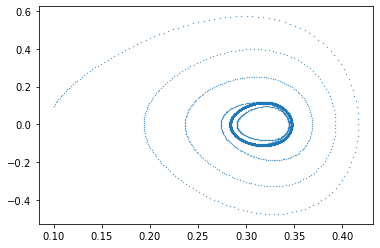

In [6]:
f = 0.3

ds = dyns.DynamicSystem([0.1,0.1], ["y", "f*sin(sin(3.5*t))-y+10*x-100*x^3"], 'x,y', f'f:={f};')
ds.SetDt(0.01)
trajectory = ds.GetTrajectory(N)

xy = np.array(trajectory).transpose()
x, y = xy[0], xy[1]
plt.scatter(x=x, y=y, s=0.1)

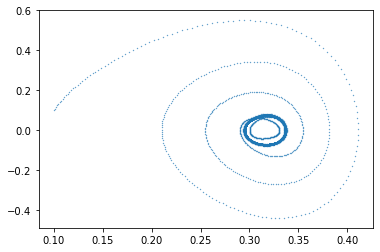

In [10]:
f = 0.2

ds = dyns.DynamicSystem([0.1,0.1], ["y", "f*sin(sin(3.5*t))-y+10*x-100*x^3"], 'x,y', f'f:={f};')
ds.SetDt(0.01)
trajectory = ds.GetTrajectory(N)

xy = np.array(trajectory).transpose()
x, y = xy[0], xy[1]
plt.scatter(x=x, y=y, s=0.1)

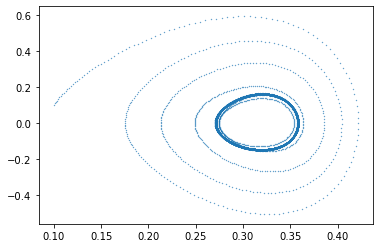

In [11]:
f = 0.4

ds = dyns.DynamicSystem([0.1,0.1], ["y", "f*sin(sin(3.5*t))-y+10*x-100*x^3"], 'x,y', f'f:={f};')
ds.SetDt(0.01)
trajectory = ds.GetTrajectory(N)

xy = np.array(trajectory).transpose()
x, y = xy[0], xy[1]
plt.scatter(x=x, y=y, s=0.1)

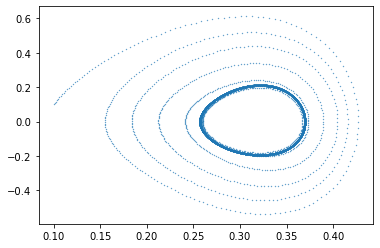

In [7]:
# образец траектории при f = f0
xy = np.array(t).transpose()
x, y = xy[0], xy[1]
plt.scatter(x=x, y=y, s=0.1)

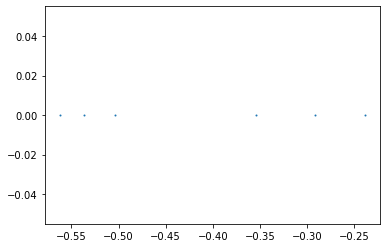

In [8]:
# образец сечения Пуанкаре при f = f0
xy = np.array(pm).transpose()
x, y = xy[0], xy[1]
plt.scatter(x=x, y=y, s=1)

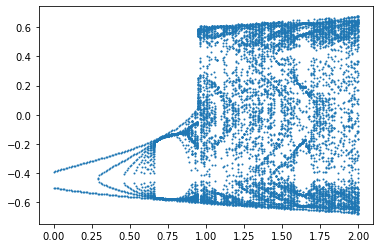

In [9]:
# биффуркационная диаграмма по параметру f в границах [0, 2]
_f_biff = [[[PM[0], _pm[0]] for _pm in PM[1]] for PM in PMs] #[PM[0], _pm]
f_biff = []
for _ in _f_biff:
    f_biff += _
f_biff = np.array(f_biff).transpose()
plt.scatter(x=f_biff[0], y=f_biff[1], s=1)